In [ ]:
# Importing libraries
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

In [ ]:
# reading the data
# stock prices
stock_price_df = pd.read_csv('/content/drive/MyDrive/Data Science/semana-data-science/stock.csv')
# stock volume
stock_volume_df = pd.read_csv('/content/drive/MyDrive/Data Science/semana-data-science/stock_volume.csv')

In [ ]:
# show the price df
stock_price_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [ ]:
# Show the volume df
stock_volume_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000


In [ ]:
# Sort the prices based on Date
stock_price_df.sort_values('Date', ascending=True, inplace=True)

In [ ]:
# Sort the volume based on Date
stock_volume_df.sort_values('Date', ascending=True, inplace=True)

In [ ]:
# Checking missing values
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
# Checking missing values
stock_volume_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
# Get stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
# Get stock volume dataframe info
stock_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [ ]:
normalized_df = normalize(stock_price_df)
normalized_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title=title)
  for i in df.columns[1:]:
    fig.add_scatter(x=df['Date'], y=df[i], name=i)
  fig.show()

In [ ]:
interactive_plot(normalized_df, 'Stock Prices')

In [ ]:
# Get individual stock
def get_stock(price_df, volume_df, name):
  return pd.DataFrame({'Date':price_df['Date'], 'Close':price_df[name], 'Volume':volume_df[name]})

In [ ]:
# Testing the get_stock function obtained Apple stock
price_volume_df = get_stock(stock_price_df, stock_volume_df, 'AAPL')
price_volume_df

,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600
...,...,...,...
2154,2020-08-05,440.250000,30498000
2155,2020-08-06,455.609985,50607200
2156,2020-08-07,444.450012,49453300
2157,2020-08-10,450.910004,53100900


In [ ]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 

def trading_window(data):
  n=1
  data['Target'] = data[['Close']].shift(-n)
  return data

In [ ]:
target_df = trading_window(price_volume_df)
target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004
2157,2020-08-10,450.910004,53100900,437.500000


In [ ]:
target_df = target_df[:-1]
target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2153,2020-08-04,438.660004,43267900,440.250000
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004


In [ ]:
# Scaling the data
sc = MinMaxScaler(feature_range= (0,1))
scaled_df = sc.fit_transform(target_df.drop(columns='Date'))
scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [ ]:
scaled_df.shape

(2158, 3)

In [ ]:
# Create Feature and Target
X = scaled_df[:, :2]
y = scaled_df[:, 2:]

In [ ]:
X

array([[0.01102638, 0.11442624],
       [0.01046185, 0.12362365],
       [0.01220906, 0.13517696],
       ...,
       [1.        , 0.10747163],
       [0.97208751, 0.10431171],
       [0.98824476, 0.11430054]])

In [ ]:
y

array([[0.01046185],
       [0.01220906],
       [0.01378478],
       ...,
       [0.97208751],
       [0.98824476],
       [0.95470465]])

In [ ]:
X.shape, y.shape

((2158, 2), (2158, 1))

In [ ]:
# split the data in 70% training and 30% testing
split = int(0.7 * (len(X)))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1510, 2), (1510, 1), (648, 2), (648, 1))

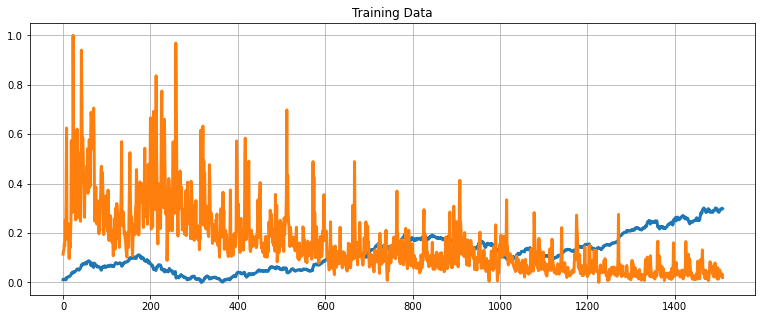

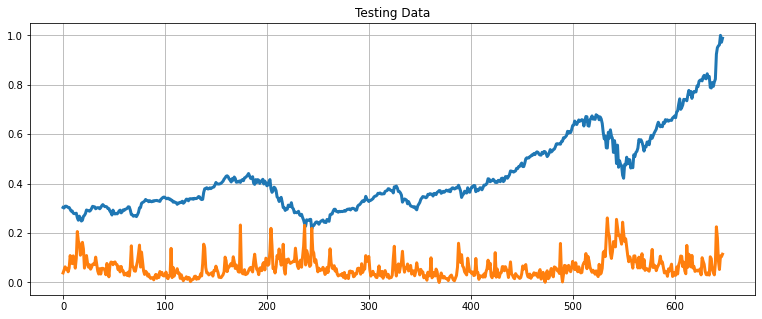

In [ ]:
def show_plot(df, title):
  plt.figure(figsize= (13,5))
  plt.title(title)
  plt.plot(df, linewidth= 3)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test,'Testing Data')

# Ridge Regression



[Ridge Regression](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf) "is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value."

* Ridge regression advantage is to avoid overffiting.

* Overfitting occours when the trained model perform well on the training data and performs poorly on the testing datasets. 

* Ridge regresion works by applying a penalizing term(reducing the weights and biases) to overcome overfitting.

In [ ]:
# Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
model = Ridge()
model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
accuracy = model.score(X_test, y_test)
print('Ridge Regression score:', accuracy)

Ridge Regression score: 0.885430087043191


In [ ]:
# Price predicting
predicted_price = model.predict(X)
predicted_price

array([[0.02995428],
       [0.02905623],
       [0.03000341],
       ...,
       [0.86581246],
       [0.84237512],
       [0.85556832]])

In [ ]:
# add the predicted values into a list
Predicted = []
for i in predicted_price:
  Predicted.append(i[0])

In [ ]:
len(Predicted)

2158

In [ ]:
# Append the close values to the list
close = []
for i in scaled_df:
  close.append(i[0])

In [ ]:
len(close)

2158

In [ ]:
# create a new dataframe
df_predicted = target_df[['Date']]
df_predicted

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [ ]:
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2012-01-12,0.011026
1,2012-01-13,0.010462
2,2012-01-17,0.012209
3,2012-01-18,0.013785
4,2012-01-19,0.013299
...,...,...
2153,2020-08-04,0.957606
2154,2020-08-05,0.961583
2155,2020-08-06,1.000000
2156,2020-08-07,0.972088


In [ ]:
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2012-01-12,0.011026,0.029954
1,2012-01-13,0.010462,0.029056
2,2012-01-17,0.012209,0.030003
3,2012-01-18,0.013785,0.030272
4,2012-01-19,0.013299,0.030334
...,...,...,...
2153,2020-08-04,0.957606,0.830916
2154,2020-08-05,0.961583,0.835877
2155,2020-08-06,1.000000,0.865812
2156,2020-08-07,0.972088,0.842375


In [ ]:
# plotting the data
interactive_plot(df_predicted, 'Original Price vs. Ridge Regression Predictions')

# LSTM

In [ ]:
price_volume_df = get_stock(stock_price_df, stock_volume_df, 'sp500')
price_volume_df

,Date,Close,Volume
0,2012-01-12,1295.500000,4019890000
1,2012-01-13,1289.089966,3692370000
2,2012-01-17,1293.670044,4010490000
3,2012-01-18,1308.040039,4096160000
4,2012-01-19,1314.500000,4465890000
...,...,...,...
2154,2020-08-05,3327.770020,4732220000
2155,2020-08-06,3349.159912,4267490000
2156,2020-08-07,3351.280029,4104860000
2157,2020-08-10,3360.469971,4318570000


In [ ]:
# shifting our dataset
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.29550000e+03, 4.01989000e+09],
       [1.28908997e+03, 3.69237000e+09],
       [1.29367004e+03, 4.01049000e+09],
       ...,
       [3.35128003e+03, 4.10486000e+09],
       [3.36046997e+03, 4.31857000e+09],
       [3.33368994e+03, 5.08765000e+09]])

In [ ]:
# scaling our data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [ ]:
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [ ]:
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1510, 1, 1), (648, 1, 1))

In [ ]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 150)            91200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 150)            180600    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151 

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
38/38 [==============================] - 7s 59ms/step - loss: 0.0524 - val_loss: 0.0649
Epoch 2/20
38/38 [==============================] - 1s 14ms/step - loss: 0.0096 - val_loss: 0.0036
Epoch 3/20
38/38 [==============================] - 1s 14ms/step - loss: 9.7589e-04 - val_loss: 8.9553e-05
Epoch 4/20
38/38 [==============================] - 1s 14ms/step - loss: 3.8742e-04 - val_loss: 4.7830e-04
Epoch 5/20
38/38 [==============================] - 1s 14ms/step - loss: 3.6900e-04 - val_loss: 1.9690e-04
Epoch 6/20
38/38 [==============================] - 1s 14ms/step - loss: 3.3881e-04 - val_loss: 1.3087e-04
Epoch 7/20
38/38 [==============================] - 1s 14ms/step - loss: 3.4338e-04 - val_loss: 8.0324e-05
Epoch 8/20
38/38 [==============================] - 1s 14ms/step - loss: 3.0209e-04 - val_loss: 8.2105e-05
Epoch 9/20
38/38 [==============================] - 1s 14ms/step - loss: 3.2658e-04 - val_loss: 4.3021e-05
Epoch 10/20
38/38 [==============================] - 

In [ ]:
# Make prediction
predicted = model.predict(X)

In [ ]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

test_predicted

[0.0056286156,
 0.002566453,
 0.0047544334,
 0.011618647,
 0.014704114,
 0.015124413,
 0.015420521,
 0.014775761,
 0.020225013,
 0.016581126,
 0.015578111,
 0.013992466,
 0.013705903,
 0.019284185,
 0.019976672,
 0.029221198,
 0.028949013,
 0.03024771,
 0.031637013,
 0.032587066,
 0.028142141,
 0.032501165,
 0.031894833,
 0.028423818,
 0.035494436,
 0.037017208,
 0.03748501,
 0.03531302,
 0.038081694,
 0.039170038,
 0.040053066,
 0.042243928,
 0.039141424,
 0.0431555,
 0.0410268,
 0.03849697,
 0.028485887,
 0.032911725,
 0.039251205,
 0.041618645,
 0.041723642,
 0.053587135,
 0.052790362,
 0.056759886,
 0.057508923,
 0.06017083,
 0.058152944,
 0.05689826,
 0.052074656,
 0.05414062,
 0.06339535,
 0.061492167,
 0.058162495,
 0.057084322,
 0.05956021,
 0.06460211,
 0.06190239,
 0.05502326,
 0.054603405,
 0.04702598,
 0.03575696,
 0.040587652,
 0.049588565,
 0.041327506,
 0.04099813,
 0.05112033,
 0.04842902,
 0.0445062,
 0.045274567,
 0.03974279,
 0.042143658,
 0.051077347,
 0.055509917,


In [ ]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
5,2012-01-20
...,...
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07
2157,2020-08-10


In [ ]:
df_predicted['predictions'] = test_predicted
df_predicted

,Date,predictions
1,2012-01-13,0.005629
2,2012-01-17,0.002566
3,2012-01-18,0.004754
4,2012-01-19,0.011619
5,2012-01-20,0.014704
...,...,...
2154,2020-08-05,0.920408
2155,2020-08-06,0.929212
2156,2020-08-07,0.938044
2157,2020-08-10,0.938918


In [ ]:

close = []
for i in training_set_scaled:
  close.append(i[0])

In [ ]:
df_predicted['Close'] = close[1:]

In [ ]:
df_predicted

,Date,predictions,Close
1,2012-01-13,0.005629,0.005242
2,2012-01-17,0.002566,0.007414
3,2012-01-18,0.004754,0.014231
4,2012-01-19,0.011619,0.017295
5,2012-01-20,0.014704,0.017713
...,...,...,...
2154,2020-08-05,0.920408,0.972307
2155,2020-08-06,0.929212,0.982453
2156,2020-08-07,0.938044,0.983459
2157,2020-08-10,0.938918,0.987819


In [ ]:
interactive_plot(df_predicted,'Original Price vs. LSTM Predictions')